# Classification

### Ex. 1 - kNN - own implementation

In [50]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from scipy.spatial import distance
from sklearn.metrics import accuracy_score

In [76]:
iris = datasets.load_iris()

# separate the set for teaching and testing, test_size - percentage share (example 70% for training and 30% for testing)
features_train, features_test, labels_train, labels_test = train_test_split(iris.data, iris.target, test_size=0.5, random_state=42)

# An example of using the Euclidean distance
distance.euclidean(features_train[1, :], features_train[2, :])

2.1587033144922905

In [52]:
def kNN_algorithm(X_train, y_train, X_test, n_neighbours: int):

    y_pred = np.zeros((X_test.shape[0], 1))

    for i, own_features in enumerate(X_test):
        ngbrs_idx_and_distance = []

        for j, ngbr_features in enumerate(X_train):
            ngbrs_idx_and_distance.append((j, distance.euclidean(own_features, ngbr_features)))

        ngbrs_idx_and_distance.sort(reverse=False, key=lambda x: x[1])
        nearest_neighbours = ngbrs_idx_and_distance[:n_neighbours]
        i_pred = []

        for idx, _ in nearest_neighbours:
            i_pred.append(y_train[idx])

        y_pred[i] = np.round(np.mean(i_pred))

    return y_pred

In [53]:
# Check correctness of my algorithm

predictions = kNN_algorithm(features_train, labels_train, features_test, n_neighbours=5)

accuracy_score(labels_test, predictions)

0.9466666666666667

In [54]:
k_list = [k for k in range(3, 21, 2)]  # how many neighbours to choose
train_error_list = []
test_error_list = []

for k in k_list:
    predictions_train = kNN_algorithm(features_train, labels_train, features_train, n_neighbours=k)
    predictions_test = kNN_algorithm(features_train, labels_train, features_test, n_neighbours=k)

    train_error_list.append(1 - accuracy_score(labels_train, predictions_train))
    test_error_list.append(1 - accuracy_score(labels_test, predictions_test))

### Effectiveness of my algorithm with different nearest neighbours parameter

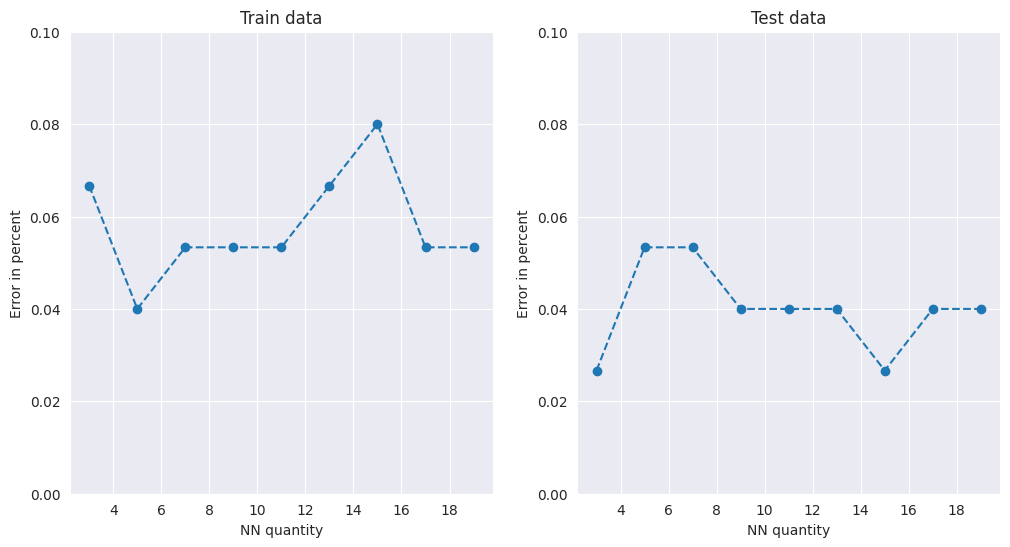

In [55]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.plot(k_list, train_error_list, '--o')
ax1.set_title('Train data')
ax1.set_xlabel('NN quantity')
ax1.set_ylabel('Error in percent')
ax1.set_ylim([0.0, 0.1])
ax2.plot(k_list, test_error_list, '--o')
ax2.set_title('Test data')
ax2.set_xlabel('NN quantity')
ax2.set_ylabel('Error in percent')
ax2.set_ylim([0.0, 0.1])
plt.show()

### Ex. 2 - kNN - Python (sklearn)

In [56]:
from sklearn.neighbors import KNeighborsClassifier

kNN = KNeighborsClassifier(n_neighbors=3, p=2)

In [57]:
kNN.fit(features_train, labels_train)

KNeighborsClassifier(n_neighbors=3)

In [58]:
predictions = kNN.predict(features_test)

accuracy_score(labels_test, predictions)

0.9733333333333334

In [59]:
kNN.predict_proba(features_test[:10])

array([[0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.66666667, 0.33333333],
       [0.        , 1.        , 0.        ]])

In [60]:
k_list = [k for k in range(3, 21, 2)]  # how many neighbours to choose
train_error_list = []
test_error_list = []

for k in k_list:
    kNN = KNeighborsClassifier(n_neighbors=k, p=2)

    kNN.fit(features_train, labels_train)

    predictions_train = kNN.predict(features_train)
    predictions_test = kNN.predict(features_test)

    train_error_list.append(1 - accuracy_score(labels_train, predictions_train))
    test_error_list.append(1 - accuracy_score(labels_test, predictions_test))

### Check efficiency of algorithm with different k parameter

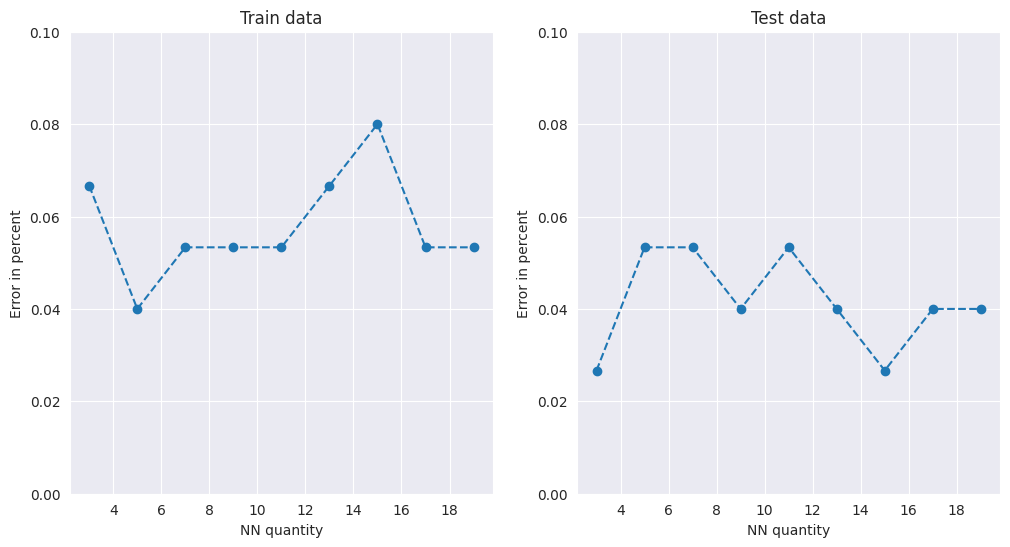

In [61]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.plot(k_list, train_error_list, '--o')
ax1.set_title('Train data')
ax1.set_xlabel('NN quantity')
ax1.set_ylabel('Error in percent')
ax1.set_ylim([0.0, 0.1])
ax2.plot(k_list, test_error_list, '--o')
ax2.set_title('Test data')
ax2.set_xlabel('NN quantity')
ax2.set_ylabel('Error in percent')
ax2.set_ylim([0.0, 0.1])
plt.show()

### Ex.3 - Decision trees

In [62]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

clf = DecisionTreeClassifier()
clf.fit(features_train, labels_train)

DecisionTreeClassifier()

In [63]:
clf.predict(iris.data[:1, :])

array([0])

In [64]:
clf.predict_proba(iris.data[:1, :])

array([[1., 0., 0.]])

In [65]:
from six import StringIO
import pydot

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
graph[0].write('iris.png')

True

# Exercise - MNIST dataset

In [66]:
# -*- coding: utf-8 -*-
from sklearn import tree
from keras.datasets import mnist

def plot_mnist(images, titles, h, w, n_row=3, n_col=4):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.05)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)).T, cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

### Load dataset and split into learner (6/7) and training (1/7).

In [67]:
# Divide the data into parameters X and answer y:

(X_3D_train, y_train), (X_3D_test, y_test) = mnist.load_data()

### Show 9 example images

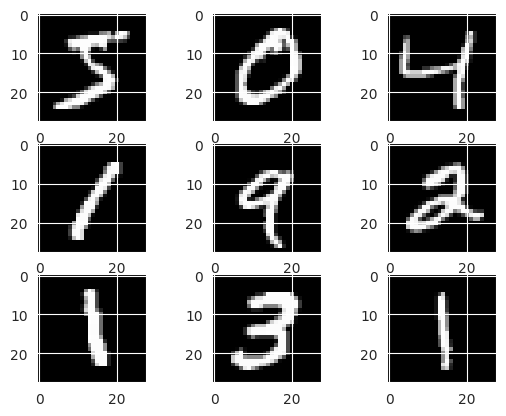

In [68]:
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_3D_train[i], cmap=plt.get_cmap('gray'))
plt.show()

### Reshape parameters

In [69]:
X_train = np.reshape(X_3D_train, (60000, 28*28))
X_test = np.reshape(X_3D_test, (10000, 28*28))

### Check size

In [70]:
print('X_train: ' + str(X_train.shape))
print('y_train: ' + str(y_train.shape))
print('X_test:  ' + str(X_test.shape))
print('y_test:  ' + str(y_test.shape))

X_train: (60000, 784)
y_train: (60000,)
X_test:  (10000, 784)
y_test:  (10000,)


### Pixel values range

In [71]:
print('MIN:', np.min(X_train))
print('MAX:', np.max(X_train))

MIN: 0
MAX: 255


### Create an instance of the classifier, then train and predict for test data.

In [72]:
DEPTH = 10

clf2 = DecisionTreeClassifier(max_depth=DEPTH)

clf2.fit(X_train, y_train)

pred_y = clf2.predict(X_test)

### Check F1 result, confusion matrix and classification report.

In [73]:
from sklearn.metrics import classification_report, f1_score

f1_score(y_test, pred_y, average='weighted')

0.8664342150753634

In [74]:
print(classification_report(y_test, pred_y))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       980
           1       0.95      0.96      0.95      1135
           2       0.86      0.83      0.85      1032
           3       0.82      0.84      0.83      1010
           4       0.86      0.85      0.86       982
           5       0.83      0.81      0.82       892
           6       0.91      0.87      0.89       958
           7       0.90      0.88      0.89      1028
           8       0.80      0.82      0.81       974
           9       0.81      0.86      0.84      1009

    accuracy                           0.87     10000
   macro avg       0.87      0.86      0.86     10000
weighted avg       0.87      0.87      0.87     10000



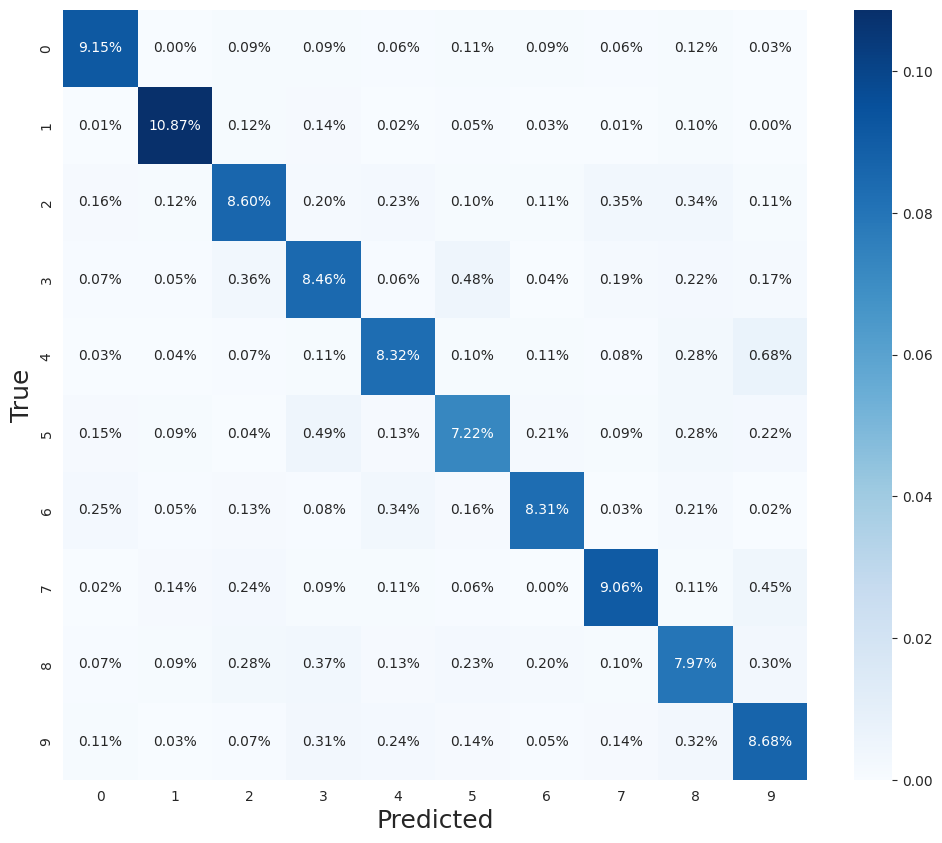

In [75]:
from sklearn.metrics import confusion_matrix
from seaborn import heatmap

cm = confusion_matrix(y_test, pred_y, labels=clf2.classes_)
plt.figure(figsize=(12, 10))
heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')
plt.xlabel('Predicted', fontsize=18)
plt.ylabel('True', fontsize=18)
plt.show()